In [1]:
from ndiff import ppm_routines
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()
%matplotlib inline


In [2]:
def ppm_reconstruction(h, Slayer):    
    Sinterface = np.zeros(np.size(Slayer)+1, dtype=np.float32)
    ppm_routines.interface_scalar(h, Slayer, Sinterface, 2)
    Sl = np.zeros(np.size(Slayer), dtype=np.float32)
    Sr = np.zeros(np.size(Slayer), dtype=np.float32)
    ppm_routines.ppm_left_right_edge_values(Slayer.astype(np.float32), Sinterface, Sl, Sr)
    return Sl, Sr

In [3]:
# Set up some examples based on Alistair's schematics of the neutral diffusion
# Identical columns
hl = np.array([10.,10.,10.,10.])
hr = np.array([10.,10.,10.,10.])
zil = np.array(0) ; zil = np.append(zil,hl.cumsum())
zir = np.array(0) ; zir = np.append(zir,hr.cumsum())
Tr = np.array([20.,16.,12.,10.])
Tl = np.array([18.,14.,10.,8.])

Tl_t, Tl_b = ppm_reconstruction(hl, Tl)
zl_t = hl.cumsum() - hl[0]
zl_b = hl.cumsum()
zl_c = hl.cumsum() - hl/2.

Tr_t, Tr_b = ppm_reconstruction(hr, Tr)
zr_t = hr.cumsum() - hr[0]
zr_b = hr.cumsum()
zr_c = hr.cumsum() - hr/2.

/home/ashao/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ashao/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


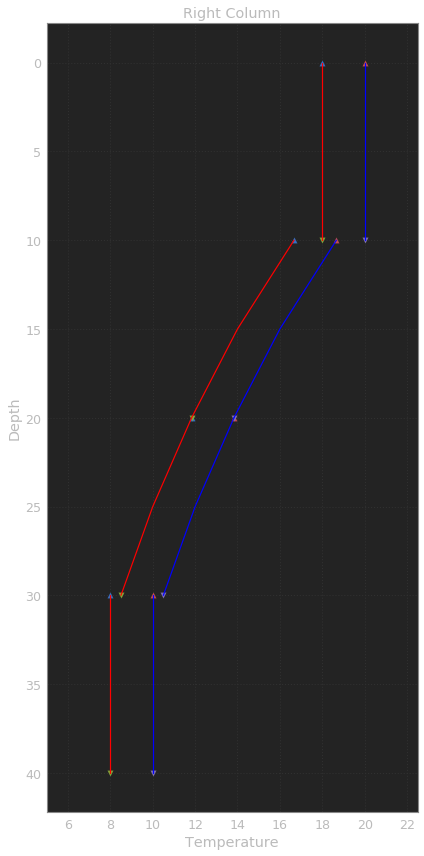

In [4]:
plt.figure(figsize=(6,12))
#plt.subplot(1,2,1)
for k in np.arange(0,hl.size):
    z = np.array( [zl_t[k], zl_c[k], zl_b[k]])
    T = np.array( [Tl_t[k], Tl[k], Tl_b[k]] )
    plt.plot(T,z, color='red')
plt.scatter(Tl_t, zl_t, marker='^')
plt.scatter(Tl_b, zl_b, marker='v')
plt.grid(ls='dotted')
plt.xlabel('Temperature')
plt.ylabel('Depth')
plt.title('Left Column')
plt.xlim( (5,22.5) )

#plt.subplot(1,2,2)
for k in np.arange(0,hl.size):
    z = np.array( [zr_t[k], zr_c[k], zr_b[k]] )
    T = np.array( [Tr_t[k], Tr[k], Tr_b[k]] )
    plt.plot(T,z, color = 'blue')
plt.scatter(Tr_t, zr_t, marker='^')
plt.scatter(Tr_b, zr_b, marker='v')    
plt.grid(ls='dotted')
plt.xlabel('Temperature')
plt.title('Right Column')
plt.xlim( (5,22.5) )
plt.gca().invert_yaxis()
plt.savefig('warmer_left.eps',format='eps')
plt.show()

In [9]:
pol = np.zeros(4*hl.size, dtype=np.float32)
por = np.zeros(4*hl.size, dtype=np.float32)
kol = np.zeros(4*hl.size, dtype=np.int32)
kor = np.zeros(4*hl.size, dtype=np.int32)
heff = np.zeros(4*hl.size-1,dtype=np.float32)
Sl_t = np.zeros(hl.size) ; Sl_b = np.zeros(hl.size)
Sr_t = np.zeros(hl.size) ; Sr_b = np.zeros(hl.size)
drdt_lt = np.ones(hl.size)*0.1 ; drdt_lb = np.ones(hl.size)*0.1
drds_lt = np.zeros(hl.size) ; drds_lb = np.zeros(hl.size)
drdt_rt = np.ones(hl.size) ; drdt_rb = np.ones(hl.size)
drds_rt = np.zeros(hl.size) ; drds_rb = np.zeros(hl.size)
Pl = np.zeros(2*hl.size, dtype=np.float32) ; Pr = np.zeros(2*hl.size, dtype=np.float32)
Sl = np.zeros(2*hl.size, dtype=np.float32) ; Sr = np.zeros(2*hl.size, dtype=np.float32)
Tl = np.zeros(2*hl.size, dtype=np.float32) ; Tr = np.zeros(2*hl.size, dtype=np.float32)

ppm_routines.find_neutral_surface_positions_discontinuous(
    zil, Tl_t, Tl_b, Sl_t, Sl_b, drdt_lt, drdt_lb, drds_lt, drds_lb,
    zir, Tr_t, Tr_b, Sr_t, Sr_b, drdt_rt, drdt_rb, drds_rt, drds_rb,
    pol, por, kol, kor, heff, Pl, Pr, Sl, Sr, Tl, Tr)

/home/ashao/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ashao/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


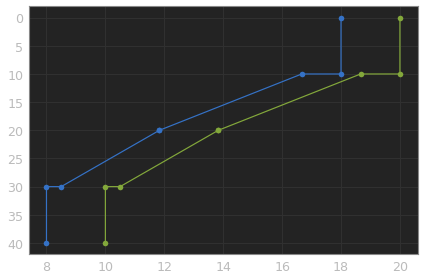

In [10]:
plt.plot(Tl,Pl,'o-')
plt.plot(Tr,Pr,'o-')
plt.gca().invert_yaxis()
plt.show()

In [11]:
print(kol)
print(kor)

[1 1 2 2 3 3 4 4 4 4 4 4 4 4 4 4]
[1 1 1 1 1 1 1 1 1 1 2 2 3 3 4 4]


In [12]:
print(pol)
print(por)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
